# CS210 - Project EDA


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import requests
import re


In [74]:


# File name and path of the CSV file
file_name = 'watched.csv'

# Read the CSV file and convert it to a DataFrame
df = pd.read_csv(file_name)


floatColumns = ['Owner_rating', 'Average_rating', 'Runtime']
intColumns = ['Release_year', 'Watches', 'List_Appearances', 'Likes']


df[floatColumns] = df[floatColumns].astype(float)
df[intColumns] = df[intColumns].astype(int)

numericalColumns = floatColumns + intColumns


## Exploring the Dataset 

In [75]:

df.head()

,Film_title,Release_year,Director,Genres,Owner_rating,Average_rating,Runtime,Countries,Original_Language,Spoken_Languages,Watches,List_Appearances,Likes,Cast,Studios,Letterboxd URL
0,Cici,2022,Berkun Oya,['Drama'],4.0,3.42,151.0,['Turkey'],Turkish,['Turkish'],8279,807,1003,"['Ayça Bingöl', 'Okan Yalabık', 'Fatih Artman'...",['Krek Film'],https://letterboxd.com//film/cici-2022/
1,The Banshees of Inisherin,2022,Martin McDonagh,"['Comedy', 'Drama']",4.0,4.10,114.0,"['Ireland', 'UK', 'USA']",English,['English'],860718,196434,316371,"['Colin Farrell', 'Brendan Gleeson', 'Kerry Co...","['Searchlight Pictures', 'Blueprint Pictures',...",https://letterboxd.com//film/the-banshees-of-i...
2,EO,2022,Jerzy Skolimowski,['Drama'],3.0,3.56,88.0,"['Italy', 'Poland']",Polish,"['Polish', 'English', 'French', 'Italian']",77467,29963,20366,"['Sandra Drzymalska', 'Isabelle Huppert', 'Lor...","['Skopia Film', 'Alien Films', 'HAKA Films', '...",https://letterboxd.com//film/eo/
3,Brother's Keeper,2021,Ferit Karahan,['Drama'],3.5,3.68,85.0,"['Romania', 'Turkey']",Turkish,"['Turkish', 'Kurdish']",10014,1841,2096,"['Ekin Koç', 'Mahir İpek', 'Cansu Fırıncı', 'M...","['Asteros Film', 'Flama Booking']",https://letterboxd.com//film/brothers-keeper-2...
4,Ethos,2020,Berkun Oya,"['Drama', 'Mystery']",4.5,4.07,392.0,['Turkey'],Turkish,"['Turkish', 'Kurdish']",25716,968,4049,"['Öykü Karayel', 'Funda Eryiğit', 'Fatih Artma...",['Krek Film'],https://letterboxd.com//film/ethos-2020/


In [76]:
#Show the info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film_title         465 non-null    object 
 1   Release_year       465 non-null    int64  
 2   Director           465 non-null    object 
 3   Genres             464 non-null    object 
 4   Owner_rating       464 non-null    float64
 5   Average_rating     463 non-null    float64
 6   Runtime            464 non-null    float64
 7   Countries          465 non-null    object 
 8   Original_Language  465 non-null    object 
 9   Spoken_Languages   465 non-null    object 
 10  Watches            465 non-null    int64  
 11  List_Appearances   465 non-null    int64  
 12  Likes              465 non-null    int64  
 13  Cast               465 non-null    object 
 14  Studios            465 non-null    object 
 15  Letterboxd URL     465 non-null    object 
dtypes: float64(3), int64(4), o

In [111]:
#Give the statistical summary of numerical columns

numerical_df = df[numericalColumns]
numerical_summary = numerical_df.describe()


display(numerical_summary)



,Owner_rating,Average_rating,Runtime,Release_year,Watches,List_Appearances,Likes
count,464.000000,463.000000,464.000000,465.000000,4.650000e+02,465.000000,4.650000e+02
mean,3.365302,3.557430,124.724138,2010.991398,7.069127e+05,88024.193548,2.031666e+05
std,0.769746,0.558544,58.212664,14.874617,7.621815e+05,93706.253437,2.821434e+05
min,0.500000,1.870000,1.000000,1878.000000,2.320000e+02,30.000000,1.600000e+01
25%,3.000000,3.300000,100.000000,2008.000000,5.428600e+04,11912.000000,1.118500e+04
50%,3.500000,3.650000,117.000000,2014.000000,4.493040e+05,55024.000000,7.331000e+04
75%,4.000000,3.965000,136.000000,2020.000000,1.182699e+06,140041.000000,2.974730e+05
max,5.000000,4.620000,792.000000,2023.000000,3.109034e+06,458749.000000,1.794831e+06


In [78]:

# Split the genres and create a list of all genres
all_genres = [genre.strip("[]").strip().strip("'") for genres in df['Genres'] for genre in str(genres).split(',')]

# Create a Pandas Series from the list of genres
genres_series = pd.Series(all_genres)

# Get the top 10 most frequent genres
top_genres = genres_series.value_counts().head(10)

# Print the top 10 genres with their counts
print("Top 10 Genres:")
print(top_genres)


Top 10 Genres:
Drama              249
Adventure          130
Comedy             126
Action             100
Science Fiction     82
Thriller            79
Family              69
Fantasy             66
Animation           66
Crime               45
Name: count, dtype: int64


In [79]:


# Create a Pandas Series from the list of genres
genres_series = pd.Series(all_genres)

# Count the occurrences of each genre
genre_counts = genres_series.value_counts()

# Filter genres that appear more than 10 times
popular_genres = genre_counts[genre_counts > 10].index

# Filter the original DataFrame to include only rows where at least one genre is in popular_genres
filtered_df = df[df['Genres'].apply(lambda genres: any(genre.strip("[]").strip().strip("'") in popular_genres for genre in str(genres).split(',')))].copy()

# Create a list to store genre and popularity data
data_list = []

# Split the genres in the filtered DataFrame and create a list of all genres
for index, row in filtered_df.iterrows():
    genres_list = [genre.strip("[]").strip().strip("'") for genre in row['Genres'].split(',')]
    for genre in genres_list:
        data_dict = {'Genre': genre}
        for column in ['Release_year','Owner_rating','Average_rating', 'Runtime', 'Watches', 'List_Appearances','Likes']:
            data_dict[column] = pd.to_numeric(row[column], errors='coerce')
        data_list.append(data_dict)
# Create a DataFrame from the list
genres_popularity_df = pd.DataFrame(data_list)

for index, row in genres_popularity_df.iterrows():
    if row['Genre'] not in popular_genres:
        genres_popularity_df.drop(index, inplace=True)





# Group by genre and calculate the average popularity
average_popularity = genres_popularity_df.groupby('Genre')['Watches'].mean()

# Get the top 5 most popular genres
top_popular_genres = average_popularity.nlargest(5)

pd.options.display.float_format = '{:,.0f}'.format
# Print the top 5 genres with their average popularity scores
print("Top 5 Most Watched Genres:")
display(top_popular_genres)
pd.options.display.float_format = None

Top 5 Most Watched Genres:


Genre
Science Fiction   1,186,024
Action            1,156,879
Adventure         1,155,581
Animation           993,040
Family              905,988
Name: Watches, dtype: float64

In [98]:


# Group by genre and calculate the average popularity
owner_rating = genres_popularity_df.groupby('Genre')['Owner_rating'].mean()

# Get the top 5 most popular genres
owner_rating_genres = owner_rating.nlargest(5)

pd.set_option('display.float_format', '{:.2f}'.format)
# Print the top 5 genres with their average popularity scores
print("Top 5 High Rating Genres:")
display(owner_rating_genres)
pd.options.display.float_format = None


Top 5 High Rating Genres:


Genre
Crime     3.62
Drama     3.59
Romance   3.58
War       3.53
History   3.45
Name: Owner_rating, dtype: float64

,Genre,Release_year,Owner_rating,Average_rating,Runtime,Watches,List_Appearances,Likes
0,Drama,2022,4.0,3.42,151.0,8279,807,1003
1,Comedy,2022,4.0,4.10,114.0,860718,196434,316371
2,Drama,2022,4.0,4.10,114.0,860718,196434,316371
3,Drama,2022,3.0,3.56,88.0,77467,29963,20366
4,Drama,2021,3.5,3.68,85.0,10014,1841,2096
...,...,...,...,...,...,...,...,...
1171,Comedy,1975,3.0,3.58,88.0,10232,530,613
1172,Drama,1975,3.0,3.58,88.0,10232,530,613
1173,Family,1975,3.0,3.58,88.0,10232,530,613
1174,Drama,2020,4.0,3.59,91.0,14118,4798,3422


Here you need to categorize the movie according to popularity and Rating.There will be two new columns named "Popularity_Category" and "Rating_Category". Let it be "High" if its watches is above the 75th percentile, "Medium" if it falls between 25 and 75 (inclusive), and "Low" for all the others. For Rating, if it is below 2, call it "Low", if it is between 2 and 3.5 (inclusive), call it "Medium", and if it is greater than 3.5, let it be "High". Once the categorization is complete, print the value counts for both 'Popularity_Category' and 'Rating_Category'.

In [81]:


# Calculate the 25th, 75th percentiles for 'Watches' and 'Average_rating'
watches_25th = np.percentile(df['Watches'], 25)
watches_75th = np.percentile(df['Watches'], 75)

# Categorize 'Popularity_Category'
df['Popularity_Category'] = pd.cut(df['Watches'],
                                   bins=[float('-inf'), watches_25th, watches_75th, float('inf')],
                                   labels=['Low', 'Medium', 'High'])

# Categorize 'Rating_Category'
df['Rating_Category'] = pd.cut(df['Owner_rating'],
                               bins=[float('-inf'), 2, 3.5, float('inf')],
                               labels=['Low', 'Medium', 'High'])

# Print the value counts for both 'Popularity_Category' and 'Rating_Category'
print("Popularity Categories:")
print(df['Popularity_Category'].value_counts())

print("\nRating Categories:")
print(df['Rating_Category'].value_counts())


Popularity Categories:
Popularity_Category
Medium    232
Low       117
High      116
Name: count, dtype: int64

Rating Categories:
Rating_Category
Medium    282
High      156
Low        26
Name: count, dtype: int64


In [82]:


# Filter the DataFrame for the movie "Winter Sleep" by Nuri Bilge Ceylan
filtered_df = df[(df['Film_title'] == 'Winter Sleep') & (df['Director'] == 'Nuri Bilge Ceylan')]

# Display the filtered DataFrame
display(filtered_df)


,Film_title,Release_year,Director,Genres,Owner_rating,Average_rating,Runtime,Countries,Original_Language,Spoken_Languages,Watches,List_Appearances,Likes,Cast,Studios,Letterboxd URL,Popularity_Category,Rating_Category
250,Winter Sleep,2014,Nuri Bilge Ceylan,['Drama'],4.0,4.14,196.0,"['Turkey', 'France', 'Germany']",Turkish,"['Turkish', 'English']",53568,18618,15219,"['Haluk Bilginer', 'Melisa Sözen', 'Demet Akba...","['Memento Films Production', 'Bredok Filmprodu...",https://letterboxd.com//film/winter-sleep/,Low,High


In [83]:
# Top 10 directors
top_directors = df['Director'].value_counts().head(10).index

# Print the top 10 directors
print("Top 10 Directors:")
for i in top_directors:
    print(i)

Top 10 Directors:
Zeki Demirkubuz
Nuri Bilge Ceylan
Togan Gökbakar
Christopher Nolan
Ruben Östlund
Gaspar Noé
Yorgos Lanthimos
Robert Zemeckis
Hirokazu Kore-eda
John Lasseter


Display the name of the director among the movies that have a "High" popularity, a "High" Rating_Category, and are also above the 75th percentile in Average_Rating.



In [84]:
#6pts


# Filter based on conditions
filtered_df = df[(df['Popularity_Category'] == 'High') & 
                 (df['Rating_Category'] == 'High') & 
                 (df['Average_rating'] > df['Average_rating'].quantile(0.75))]


# Find the most common album among the filtered tracks
most_common_director = filtered_df['Director'].mode().iloc[0]

most_common_director



'Christopher Nolan'

Now, display the top 5 original language that is most common among the movies that belong to the top 10% in terms of popularity.



In [85]:

# Calculate the threshold for the top 10% in watches
rating_threshold = df['Owner_rating'].quantile(0.9)

# Filter movies that belong to the top 10% in watches
top_10_percent_movies = df[df['Owner_rating'] >= rating_threshold]

# Find the most common Original_Language among the filtered movies
most_common_language = top_10_percent_movies['Original_Language'].mode()[0]

# Exclude the most common Original_Language and find the next most common languages
remaining_languages = top_10_percent_movies['Original_Language'][top_10_percent_movies['Original_Language'] != most_common_language].value_counts().index[:4]


language_list =[]
language_list.append(most_common_language)
for i in remaining_languages:
    language_list.append(i)
    
print("\nTop 5 Original Languages:")
for j in language_list:
    print(j)





Top 5 Original Languages:
English
French
Turkish
Danish
German


## Visualization and Analysis

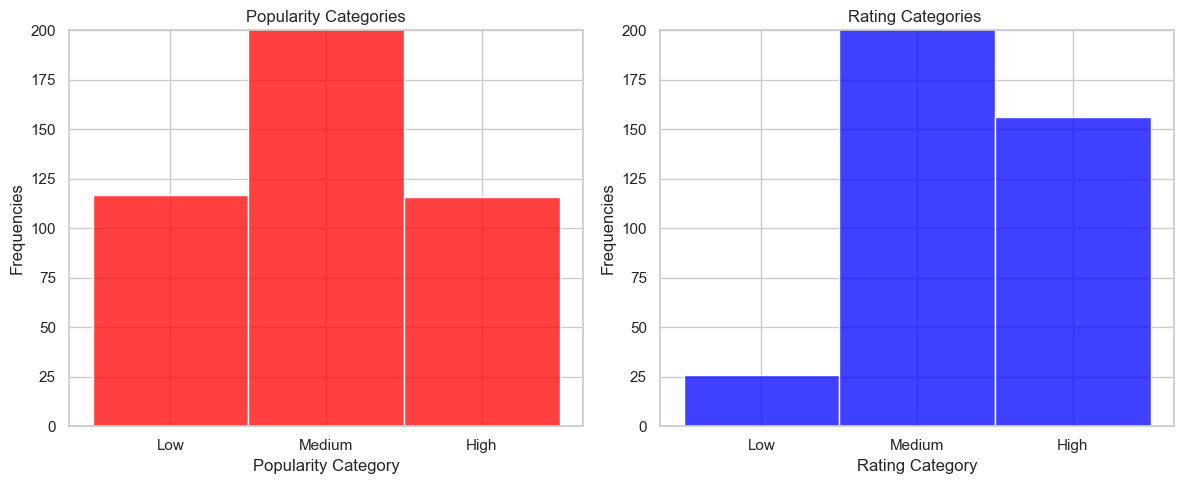

In [86]:
#2pts


# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a subplot matrix
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Create a histogram for 'Popularity_Category' with color settings
sns.histplot(df, x='Popularity_Category', bins=30, color='red', ax=axs[0])  # Tomato color
axs[0].set_title('Popularity Categories')
axs[0].set_ylabel('Frequencies')
axs[0].set_xlabel('Popularity Category')
axs[0].set_ylim(0, 200)

# Create a histogram for 'Rating_Category' with color settings
sns.histplot(df, x='Rating_Category', bins=30, color='blue', ax=axs[1])  # SteelBlue color
axs[1].set_title('Rating Categories ')
axs[1].set_ylabel('Frequencies')
axs[1].set_xlabel('Rating Category')
axs[1].set_ylim(0, 200)

# Adjust layout for a better arrangement
plt.tight_layout()

# Show the plots
plt.show()



Plot the relationship between Watched and Average rating.

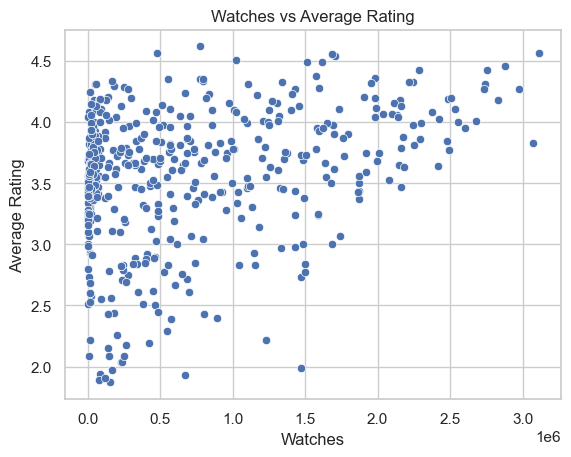

In [124]:

# Scatter plot using Seaborn


sns.scatterplot(x='Watches', y='Average_rating', data=df)
plt.title('Watches vs Average Rating')
plt.xlabel('Watches')
plt.ylabel('Average Rating')

plt.show()




Illustrate the average watches of movies over the years


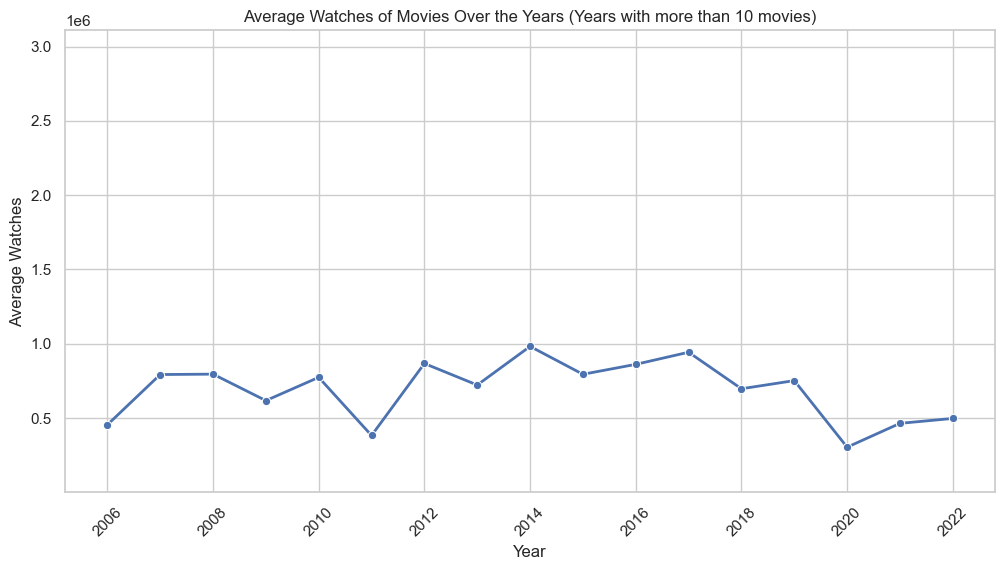

In [88]:



# Group by year and count the number of movies in each year
movie_counts_by_year = df['Release_year'].value_counts()

# Extract years with more than 10 movies
years_with_more_than_10_movies = movie_counts_by_year[movie_counts_by_year > 10].index

# Filter the DataFrame for years with more than 10 movies
df_filtered = df[df['Release_year'].isin(years_with_more_than_10_movies)]

# Group by year and calculate the average popularity
average_popularity_by_year = df_filtered.groupby('Release_year')['Watches'].mean().reset_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Line plot using Seaborn with thicker line
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release_year', y='Watches', data=average_popularity_by_year, marker='o', linewidth=2)
plt.title('Average Watches of Movies Over the Years (Years with more than 10 movies)')
plt.xlabel('Year')
plt.ylabel('Average Watches')
plt.xticks(rotation=45)  # Rotate x tick values by 45 degrees

# Set y-limits
min_popularity = df_filtered['Watches'].min() - 5
max_popularity = df_filtered['Watches'].max() + 5
plt.ylim(min_popularity, max_popularity)

plt.show()


Illustrate the average ratings of movies over the years

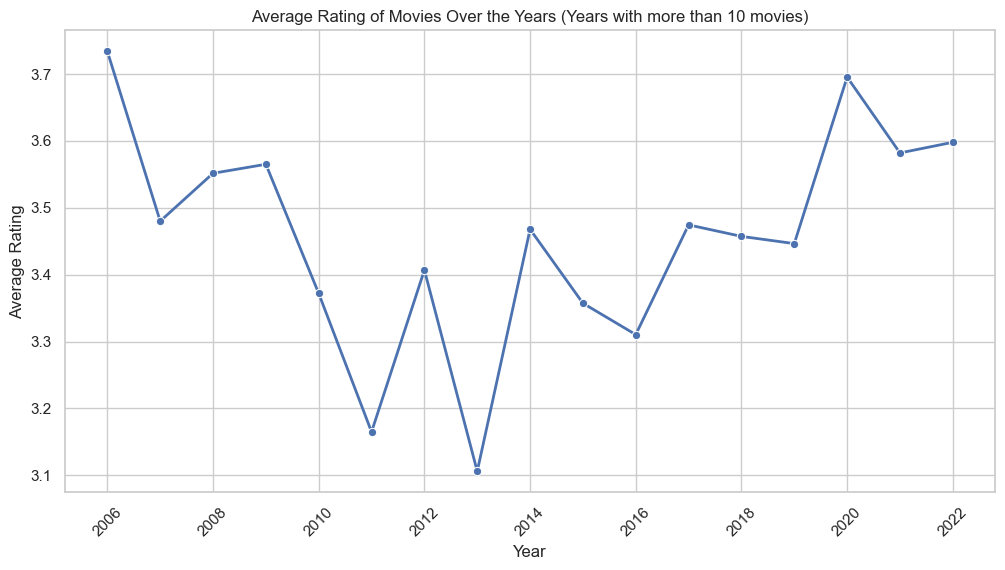

In [113]:

# Group by year and count the number of movies in each year
movie_counts_by_year = df['Release_year'].value_counts()

# Extract years with more than 10 movies
years_with_more_than_10_movies = movie_counts_by_year[movie_counts_by_year > 10].index

# Filter the DataFrame for years with more than 10 movies
df_filtered = df[df['Release_year'].isin(years_with_more_than_10_movies)]

# Group by year and calculate the average popularity
average_popularity_by_year = df_filtered.groupby('Release_year')['Average_rating'].mean().reset_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Line plot using Seaborn with thicker line
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release_year', y='Average_rating', data=average_popularity_by_year, marker='o', linewidth=2)
plt.title('Average Rating of Movies Over the Years (Years with more than 10 movies)')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)  # Rotate x tick values by 45 degrees



plt.show()





Visualize and compare the owner rating levels in the movie of four different director: Gaspar Noe, Yorgos Lanthimos, Zeki Demirkubuz and Christopher Nolan, Ruben Östlund. 

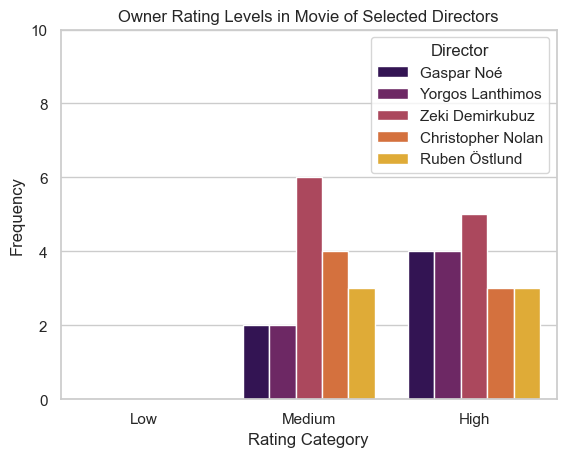

In [97]:



# Desired order of directors
selected_directors = ['Gaspar Noé', 'Yorgos Lanthimos','Zeki Demirkubuz','Christopher Nolan','Ruben Östlund']

# Filter the data for the selected directors
filtered_df = df[df['Director'].isin(selected_directors)]

# Define the order of Rating categories
rating_order = ['Low', 'Medium', 'High']

# Set up the color palette
palette = sns.color_palette("inferno", len(selected_directors))



# Create the countplot
sns.countplot(x='Rating_Category', hue='Director', data=filtered_df, order=rating_order, hue_order=selected_directors, palette=palette)

# Set plot labels and title
plt.xlabel('Rating Category')
plt.ylabel('Frequency')
plt.title('Owner Rating Levels in Movie of Selected Directors')

# Set y-axis limits for better clarity
plt.ylim(0, 10)

# Show the legend
plt.legend(title='Director')

# Display the plot
plt.show()


The aggregated Owner_rating and Average_raintg values of songs categorized by the top 10 most common genres in the dataset.




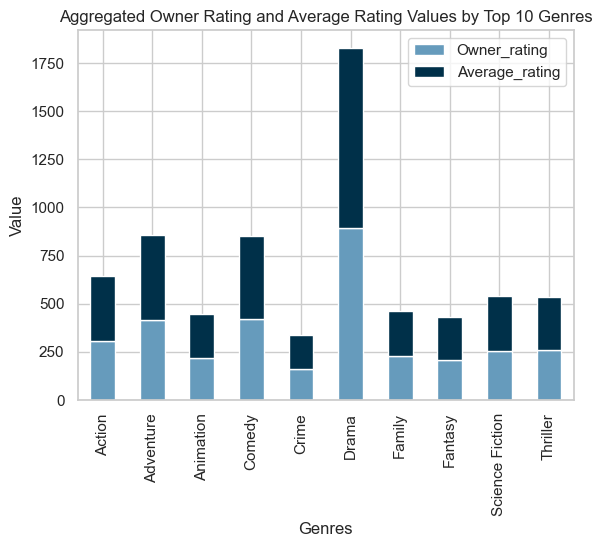

In [109]:

# Get the top 10 most common genres
top_genres = genre_counts.nlargest(10).index

# Filter the DataFrame to include only rows with one of the top 10 genres
top_genres_df = genres_popularity_df[genres_popularity_df['Genre'].isin(top_genres)].copy()

# Group by genre and calculate the sum of Owner_rating and Average_rating values
genre_energy_acoustic_sum = top_genres_df.groupby('Genre')[['Owner_rating', 'Average_rating']].sum()

# Create a stacked bar chart
genre_energy_acoustic_sum.plot(kind='bar', stacked=True, color=['#669bbc', '#003049'])
plt.title('Aggregated Owner Rating and Average Rating Values by Top 10 Genres')
plt.xlabel('Genres')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.show()




Correlations of numerical columns in a heatmap.


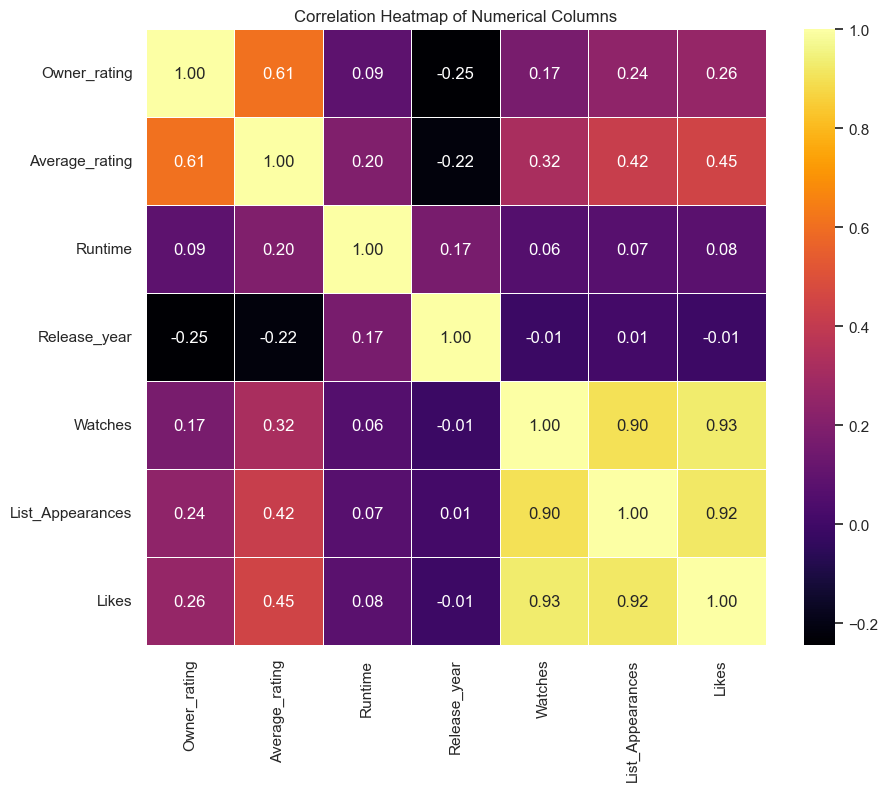

In [112]:

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

